In [66]:
# Import necessary libraries for data manipulation and machine learning
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical operations
import tensorflow  # Library for machine learning
import keras  # Library for deep learning
from sklearn.preprocessing import LabelEncoder  # Library for encoding categorical data
from sklearn.model_selection import train_test_split  # Library for splitting data into training and testing sets
from sklearn.metrics import confusion_matrix, classification_report # Library for evaluating model performance
from keras.models import Sequential  # Library for building sequential neural networks
from keras.layers import Embedding, Flatten, Dense  # Libraries for building neural network layers
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Library for padding sequences
from tensorflow.keras.preprocessing.text import Tokenizer  # Library for tokenizing text data
import matplotlib.pyplot as plt # Library for data visualization
import seaborn as sns # Library for data visualization


import warnings
warnings.filterwarnings('ignore')



In [67]:
data = pd.read_csv('train.txt', sep=';')
data.columns =['Text', 'Emotions']
data.head()

,Text,Emotions
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


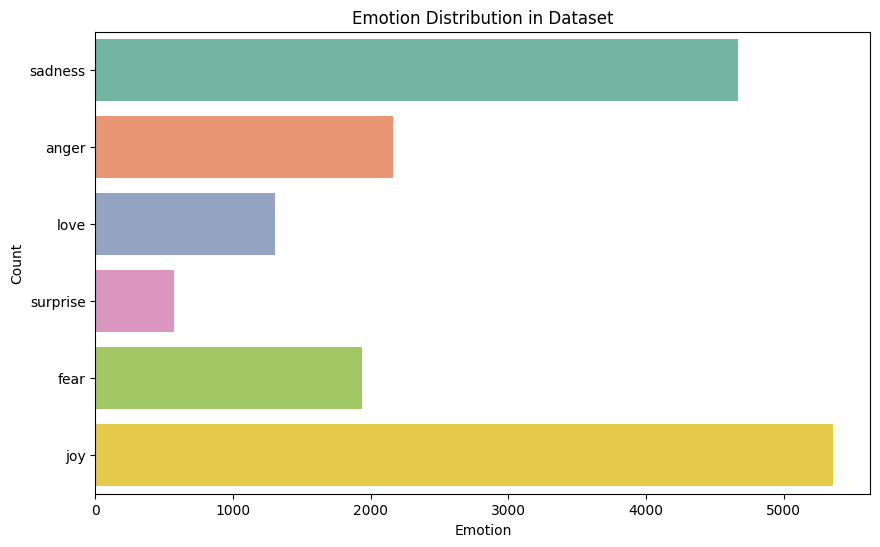

In [68]:
# Plot Emotion Distribution
plt.figure(figsize=(10,6))
sns.countplot(data['Emotions'], palette='Set2')
plt.title('Emotion Distribution in Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


In [69]:
# Tokenize the text data to prepare it for model training
texts = data['Text'].tolist()
labels = data['Emotions'].tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [70]:
sequences = tokenizer.texts_to_sequences(texts)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [71]:
padded_sequences

array([[   0,    0,    0, ...,    3,   21, 1254],
       [   0,    0,    0, ...,    2,  494,  437],
       [   0,    0,    0, ...,   29,    5, 3496],
       ...,
       [   0,    0,    0, ...,    3,  101, 1331],
       [   0,    0,    0, ...,  339,    8,   42],
       [   0,    0,    0, ...,   25, 3585,   12]], dtype=int32)

In [72]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [73]:
one_hot_labels = keras.utils.to_categorical(labels)

In [74]:
xtrain, xtest, ytrain, ytest = train_test_split(padded_sequences, one_hot_labels, test_size=0.2)

In [75]:
#define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=max_length))

model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=len(one_hot_labels[0]), activation='softmax'))

model.compile(optimizer = 'adam', loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.3916 - loss: 1.5207 - val_accuracy: 0.7178 - val_loss: 0.8431
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.8556 - loss: 0.4482 - val_accuracy: 0.8266 - val_loss: 0.5196
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9822 - loss: 0.0672 - val_accuracy: 0.8369 - val_loss: 0.5448
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9956 - loss: 0.0207 - val_accuracy: 0.8241 - val_loss: 0.5912
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9968 - loss: 0.0164 - val_accuracy: 0.8303 - val_loss: 0.6407
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9968 - loss: 0.0178 - val_accuracy: 0.8313 - val_loss: 0.6249
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9978 - loss: 0.0114 - val_accuracy: 0.8309 - val_loss: 0.6451
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9974 - loss: 0.0101 - 

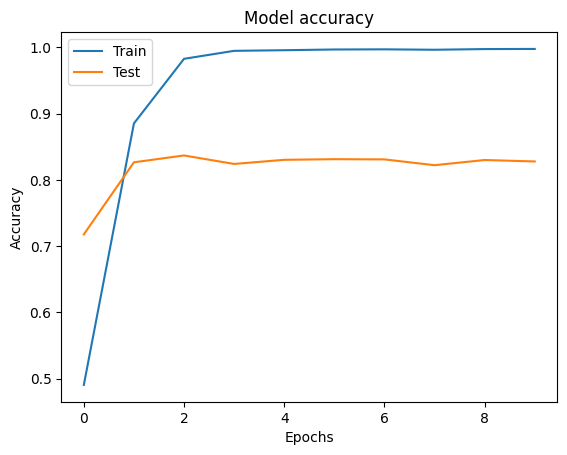

In [76]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


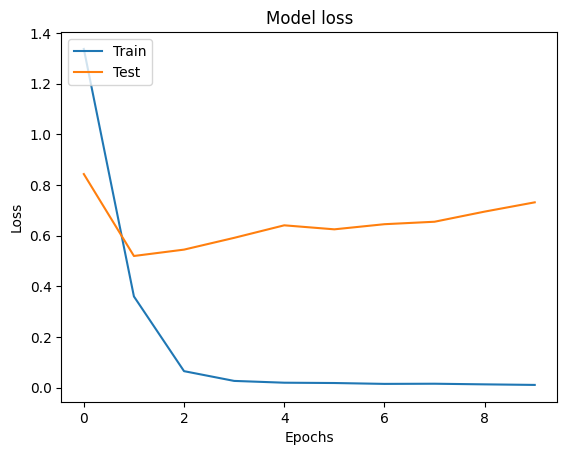

In [77]:

# Plot training & validation loss values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


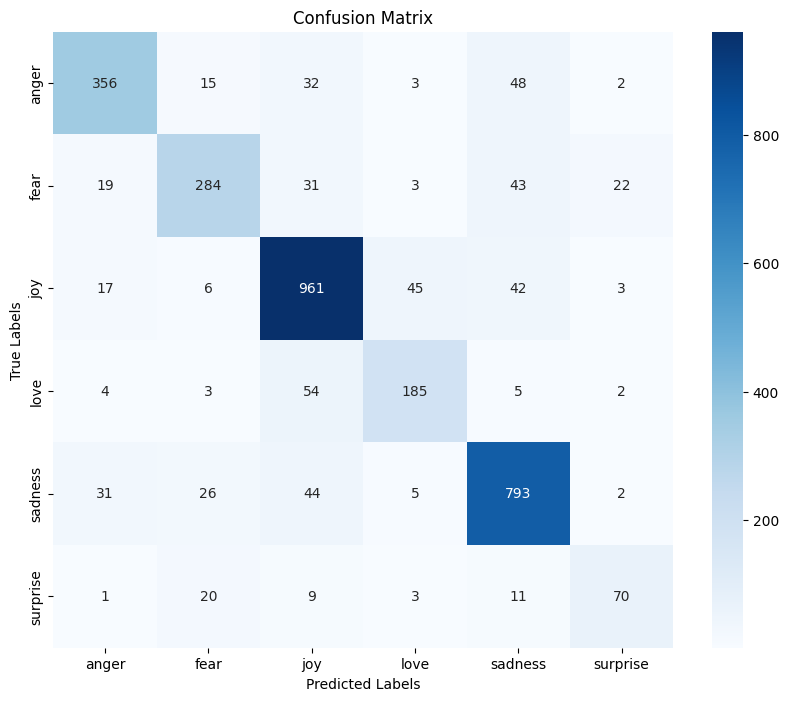

In [78]:
# Get predictions
y_pred = model.predict(xtest)
y_pred_labels = np.argmax(y_pred, axis=1)

# Get true labels
y_test_labels = np.argmax(ytest, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [79]:
print(classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

       anger       0.83      0.78      0.81       456
        fear       0.80      0.71      0.75       402
         joy       0.85      0.89      0.87      1074
        love       0.76      0.73      0.74       253
     sadness       0.84      0.88      0.86       901
    surprise       0.69      0.61      0.65       114

    accuracy                           0.83      3200
   macro avg       0.80      0.77      0.78      3200
weighted avg       0.83      0.83      0.83      3200



In [80]:
input_text = "i visited park and playland"

#

input_sequence = tokenizer.texts_to_sequences([input_text])
padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length)
prediction=model.predict(padded_input_sequence)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])
print(predicted_label[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
fear
